# Pelatihan Model Analisis Sentimen Ulasan Aplikasi

Notebook ini digunakan untuk memproses data hasil scraping dan melatih model analisis sentimen menggunakan arsitektur **LSTM (Long Short-Term Memory)**.

## Langkah-langkah:
- Load dataset hasil scraping
- Encoding label sentimen
- Tokenisasi dan padding teks
- Split data menjadi data latih dan uji
- Membuat dan melatih model LSTM
- Evaluasi model
`

In [102]:
# Import Library
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.utils import to_categorical

In [103]:
# Load data
df = pd.read_csv('twitter_data_scraping.csv')

# Tampilkan beberapa data teratas
df.head()

,userName,content,score,label,clean_content
0,Paulina Siregar,keren,5,positif,keren
1,marwan Lubis,hidup yg terpeedaya,1,negatif,hidup yg terpeedaya
2,aa,"Twitter skrng jlek skli,",5,positif,twitter skrng jlek skli
3,Siti Khofidah,udh di update tp pas dibuka ga bisa di scroll,2,negatif,udh di update tp pas dibuka ga bisa di scroll
4,Yuli Astutik,gua masuk ke akun gua sendiri kenapa di kira a...,1,negatif,gua masuk ke akun gua sendiri kenapa di kira a...


In [104]:
# Bersihkan kolom clean_content
df['clean_content'] = df['clean_content'].astype(str)  # ubah semua ke string
df = df.dropna(subset=['clean_content'])               # buang baris kosong

In [105]:
# Encode label
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

In [106]:
# Tokenisasi teks
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['clean_content'])
sequences = tokenizer.texts_to_sequences(df['clean_content'])
padded = pad_sequences(sequences, maxlen=100)

In [107]:
# Padding
max_len = 200
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [108]:
# Encode label ke format numerik
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Konversi ke one-hot encoding
labels = to_categorical(df['label_encoded'])

In [109]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

In [110]:
# Buat model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 kelas sentimen

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [111]:
# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
# Latih model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 232ms/step - accuracy: 0.7199 - loss: 0.6532 - val_accuracy: 0.9930 - val_loss: 0.0247
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 225ms/step - accuracy: 0.9876 - loss: 0.0374 - val_accuracy: 0.9930 - val_loss: 0.0203
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 223ms/step - accuracy: 0.9903 - loss: 0.0270 - val_accuracy: 0.9930 - val_loss: 0.0215
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 222ms/step - accuracy: 0.9882 - loss: 0.0265 - val_accuracy: 0.9930 - val_loss: 0.0209
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 218ms/step - accuracy: 0.9888 - loss: 0.0283 - val_accuracy: 0.9930 - val_loss: 0.0199
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 218ms/step - accuracy: 0.9903 - loss: 0.0217 - val_accuracy: 0.9930 - val_loss: 0.0178
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 218ms/step - accuracy: 0.9883 - loss: 0.0260 - val_accuracy: 0.9930 - val_loss: 0.0178
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 220ms/step - accuracy: 0.9854 - loss: 0

In [114]:
# Evaluasi
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]

print(f'\nAkurasi Training: {train_acc*100:.2f}%')
print(f'Akurasi Testing: {test_acc*100:.2f}%')


Akurasi Training: 98.93%
Akurasi Testing: 99.30%


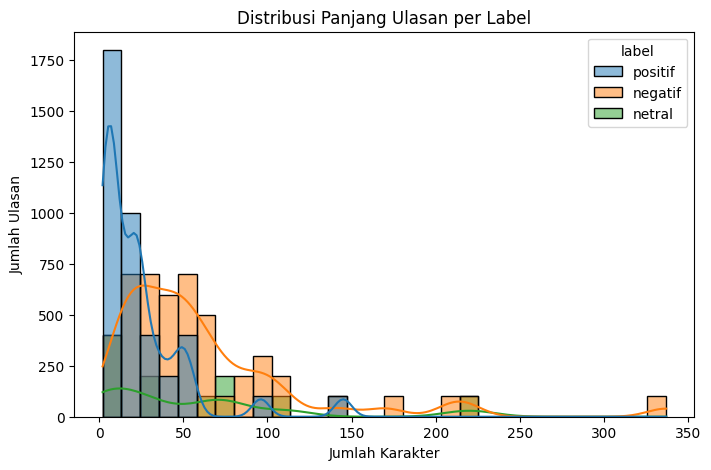

In [115]:
df['text_length'] = df['clean_content'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='text_length', hue='label', kde=True, bins=30)
plt.title('Distribusi Panjang Ulasan per Label')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Jumlah Ulasan')
plt.show()

<ipython-input-116-36d1f361175b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


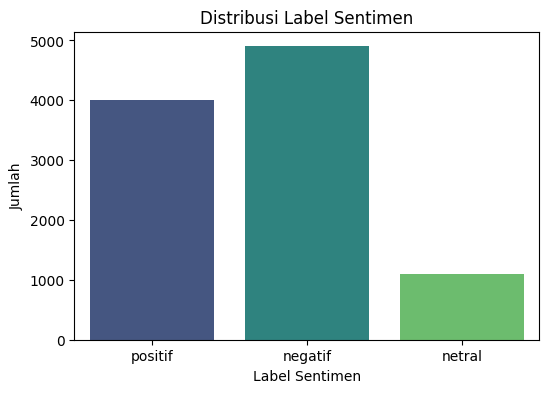

In [116]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Distribusi Label Sentimen')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [117]:
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_len)
    pred = model.predict(padded)
    label = label_encoder.inverse_transform([np.argmax(pred)])
    return label[0]


In [118]:
sample_text = "Aplikasi ini sangat membantu dan keren banget!"
print("Prediksi sentimen:", predict_sentiment(sample_text))

sample_text = "ngga bisa dibuka"
print("Prediksi sentimen:", predict_sentiment(sample_text))

sample_text = "login bermasalah"
print("Prediksi sentimen:", predict_sentiment(sample_text))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
Prediksi sentimen: positif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediksi sentimen: negatif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediksi sentimen: negatif


In [119]:
# Save model
model.save("sentiment_model.h5")

In [120]:
# Save tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


In [121]:
# Save label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [123]:
df.to_csv('data_cleaned.csv', index=False)